# 1 環境の設定

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 13

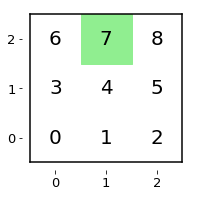

In [2]:
size = 3
fig = plt.figure(figsize=(3,3))

plt.plot([-0.5, -0.5], [-0.5, size-0.5], color='k')
plt.plot([-0.5, size-0.5], [size-0.5, size-0.5], color='k')
plt.plot([size-0.5, -0.5], [-0.5, -0.5], color='k')
plt.plot([size-0.5, size-0.5], [size-0.5, -0.5], color='k')

for i in range(size):
    for j in range(size):
        plt.text(i, j, "{}".format(i+size*j), size=20, ha="center", va="center")
        if (i,j) == (1, 2):
            x = np.array([i-0.5,i-0.5,i+0.5,i+0.5])
            y = np.array([j-0.5,j+0.5,j+0.5,j-0.5])
            plt.fill(x,y, color="lightgreen")

plt.box('off')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

In [31]:
class Environment:
    
    def __init__(self, size=3, lucky=[]):
        self.size = size
        self.lucky = lucky
        self.goal = (size-1, size-1)
        self.states = [(x, y) for x in range(size) for y in range(size)]

In [32]:
class Agent():
    
    def __init__(self, env, policy=[0, 0, 1/2, 1/2]):
        self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        self.policy = {}
        for s in env.states:
            self.policy[(s, (-1, 0))] = policy[0]
            self.policy[(s, (0, -1))] = policy[1]
            self.policy[(s, (1, 0))] = policy[2]
            self.policy[(s, (0, 1))] = policy[3]
        
    def action(self, s, a):
        if s == env.goal:
            return 0, s

        s_new = (s[0] + a[0], s[1] + a[1])
        
        if s_new == env.goal:
            return 1, s_new

        if s_new not in env.states:
            return 0, env.goal
        
        if s_new in env.lucky:
            if np.random.random() < 0.8:
                return 1, env.goal
            else:
                return 0, s_new

        return 0, s_new  

In [33]:
env = Environment()
agent = Agent(env)

In [38]:
env = Environment(size=4)
agent = Agent(env, policy=[1/4,1/4,1/4,1/4])

In [39]:
env.states

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [40]:
agent.policy

{((0, 0), (-1, 0)): 0.25,
 ((0, 0), (0, -1)): 0.25,
 ((0, 0), (1, 0)): 0.25,
 ((0, 0), (0, 1)): 0.25,
 ((0, 1), (-1, 0)): 0.25,
 ((0, 1), (0, -1)): 0.25,
 ((0, 1), (1, 0)): 0.25,
 ((0, 1), (0, 1)): 0.25,
 ((0, 2), (-1, 0)): 0.25,
 ((0, 2), (0, -1)): 0.25,
 ((0, 2), (1, 0)): 0.25,
 ((0, 2), (0, 1)): 0.25,
 ((0, 3), (-1, 0)): 0.25,
 ((0, 3), (0, -1)): 0.25,
 ((0, 3), (1, 0)): 0.25,
 ((0, 3), (0, 1)): 0.25,
 ((1, 0), (-1, 0)): 0.25,
 ((1, 0), (0, -1)): 0.25,
 ((1, 0), (1, 0)): 0.25,
 ((1, 0), (0, 1)): 0.25,
 ((1, 1), (-1, 0)): 0.25,
 ((1, 1), (0, -1)): 0.25,
 ((1, 1), (1, 0)): 0.25,
 ((1, 1), (0, 1)): 0.25,
 ((1, 2), (-1, 0)): 0.25,
 ((1, 2), (0, -1)): 0.25,
 ((1, 2), (1, 0)): 0.25,
 ((1, 2), (0, 1)): 0.25,
 ((1, 3), (-1, 0)): 0.25,
 ((1, 3), (0, -1)): 0.25,
 ((1, 3), (1, 0)): 0.25,
 ((1, 3), (0, 1)): 0.25,
 ((2, 0), (-1, 0)): 0.25,
 ((2, 0), (0, -1)): 0.25,
 ((2, 0), (1, 0)): 0.25,
 ((2, 0), (0, 1)): 0.25,
 ((2, 1), (-1, 0)): 0.25,
 ((2, 1), (0, -1)): 0.25,
 ((2, 1), (1, 0)): 0.25,
 ((2,

In [1]:
class Gridworld:
    def __init__(self, size=3, lucky=[], alpha=0.8):
        self.size = size
        self.lucky = lucky
        self.alpha = alpha
        self.start = (0, 0)
        self.goal = (size-1, size-1)

        self.states = [(x, y) for x in range(size) for y in range(size)]
        self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]

        self.policy = {}
        for s in self.states:
            self.policy[(s, (-1, 0))] = 0
            self.policy[(s, (0, -1))] = 0
            self.policy[(s, (1, 0))] = 1/2
            self.policy[(s, (0, 1))] = 1/2

        self.value = {}
        for s in self.states:
            self.value[s] = 0
            
    def move(self, s, a):
        if s == self.goal:
            return [(1, 0, s)]      

        s_new = (s[0] + a[0], s[1] + a[1])
        
        if s_new == self.goal:
            return [(1, 1, s_new)]      

        if s_new not in self.states:
            return [(1, 0, s)]  
        
        if s_new in self.lucky:
            return [(self.alpha, 1, self.goal), (1-self.alpha, 0, s_new)]

        return [(1, 0, s_new)]  

# 2 可視化用関数

In [2]:
def show_value(world):
    size = world.size
    fig = plt.figure(figsize=(3,3))

    plt.plot([-0.5, -0.5], [-0.5, size-0.5], color='k')
    plt.plot([-0.5, size-0.5], [size-0.5, size-0.5], color='k')
    plt.plot([size-0.5, -0.5], [-0.5, -0.5], color='k')
    plt.plot([size-0.5, size-0.5], [size-0.5, -0.5], color='k')
    
    result = []
    for (x, y) in world.states:
        result.append(world.value[(x, y)])
    c=0

    for i in range(size):
        for j in range(size):
            plt.text(i, j, "{:.2f}".format(result[c]), size=15, ha="center", va="center")
            if (i,j) in world.lucky:
                x = np.array([i-0.5, i-0.5, i+0.5, i+0.5])
                y = np.array([j-0.5, j+0.5, j+0.5, j-0.5])
                plt.fill(x,y, color="lightgreen")
            c += 1

    plt.box('off')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

# 3 動的計画法(valueの計算)

In [5]:
def policy_eval(world, gamma=0.5, delta=0.001):
    while True:
        delta_max = 0
        show_value(world)
        for s in world.states:
            v_new = 0
            for a in world.actions:
                results = world.move(s, a)
                for p, r, s_new in results:
                    v_new += world.policy[(s, a)] * p * (r + gamma * world.value[s_new])
            delta_max = max(delta_max, abs(world.value[s] - v_new))
            world.value[s] = v_new
        if delta_max < delta:
            break

# 4 シミュレーション

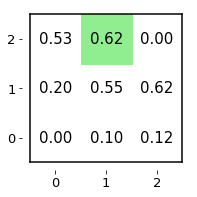

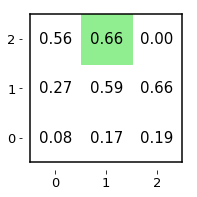

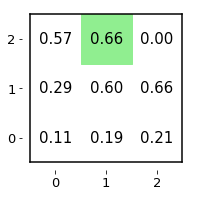

In [6]:
world = Gridworld(size=3, lucky=[(1, 2)])
policy_eval(world)

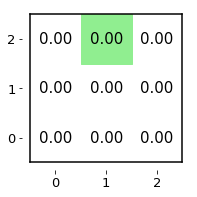

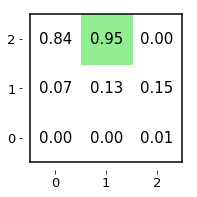

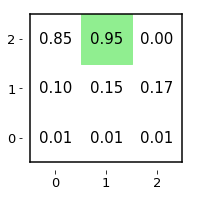

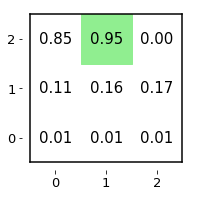

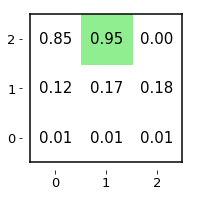

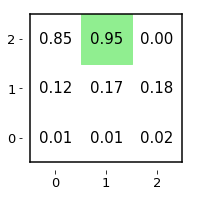

In [7]:
world = Gridworld(size=3, lucky=[(1, 2)])
for s in world.states:
    world.policy[(s, (-1, 0))] = 0
    world.policy[(s, (0, -1))] = 0
    world.policy[(s, (1, 0))] = 9/10
    world.policy[(s, (0, 1))] = 1/10
policy_eval(world, gamma=0.5)

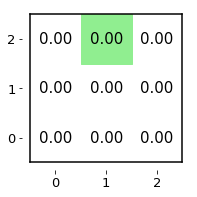

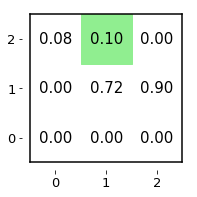

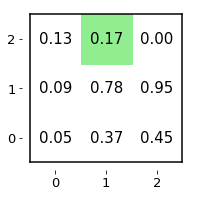

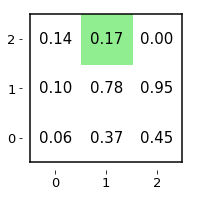

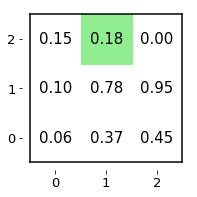

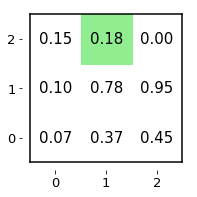

In [8]:
world = Gridworld(size=3, lucky=[(1, 2)])
for s in world.states:
    world.policy[(s, (-1, 0))] = 0
    world.policy[(s, (0, -1))] = 0
    world.policy[(s, (1, 0))] = 1/10
    world.policy[(s, (0, 1))] = 9/10
policy_eval(world, gamma=0.5)

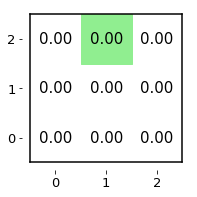

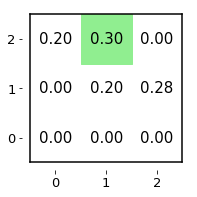

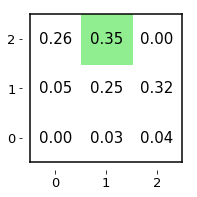

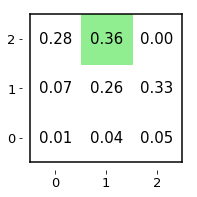

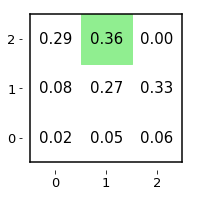

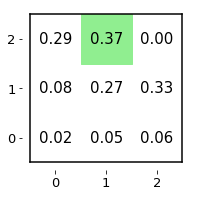

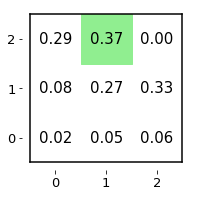

In [9]:
world = Gridworld(size=3, lucky=[(1, 2)])
for s in world.states:
    world.policy[(s, (-1, 0))] = 1/4
    world.policy[(s, (0, -1))] = 1/4
    world.policy[(s, (1, 0))] = 1/4
    world.policy[(s, (0, 1))] = 1/4
policy_eval(world, gamma=0.5)